In [1]:
# Setup dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Loading files
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"



In [4]:
mouse_data_df = pd.read_csv(mouse_drug_data)
clinical_data_df = pd.read_csv(clinical_trial_data)

In [5]:
mouse_data_df

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
...,...,...
245,i669,Placebo
246,r850,Placebo
247,a262,Placebo
248,q787,Placebo


In [6]:
clinical_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [7]:
combined_data = pd.merge(left=mouse_data_df,right=clinical_data_df, left_on='Mouse ID', right_on='Mouse ID')

In [8]:
combined_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


# Tumor Response to Treatment

In [9]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

In [10]:
tumor_response_treatment = combined_data.groupby(["Drug","Timepoint"]).mean()
tumor_response_treatment

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
...                                 ...               ...
Zoniferol 25                  55.432935          1.687500
          30                  57.713531          1.933333
          35                  60.089372          2.285714
          40                  62.916692          2.785714
          45                  65.960888          3.071429

[100 rows x 2 columns]

In [11]:
tumor_response_treatment.iloc[:,[0]]

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [12]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame

In [13]:
tumor_response_treatment_std_error = combined_data.groupby(["Drug","Timepoint"]).sem()
tumor_response_treatment_std_error


Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731
...                               ...       ...                 ...
Zoniferol 25                 0.236621       NaN            0.602513
          30                 0.248168       NaN            0.800043
          35                 0.285714       NaN            0.881426
          40                 0.299791       NaN            0.998515
          45                 0.286400       NaN            1.003576

[100 rows x 3 columns]

In [14]:
tumor_response_treatment_std_error.iloc[:,[2]]

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [15]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

In [41]:
Capomulin = tumor_response_treatment.loc["Capomulin"]["Tumor Volume (mm3)"]
Ceftamin = tumor_response_treatment.loc["Ceftamin"]["Tumor Volume (mm3)"]
Infubinol = tumor_response_treatment.loc["Infubinol"]["Tumor Volume (mm3)"]
Ketapril = tumor_response_treatment.loc["Ketapril"]["Tumor Volume (mm3)"]
Naftisol = tumor_response_treatment.loc["Naftisol"]["Tumor Volume (mm3)"]
Placebo = tumor_response_treatment.loc["Placebo"]["Tumor Volume (mm3)"]
Propriva = tumor_response_treatment.loc["Propriva"]["Tumor Volume (mm3)"]
Ramicane = tumor_response_treatment.loc["Ramicane"]["Tumor Volume (mm3)"]
Stelasyn = tumor_response_treatment.loc["Stelasyn"]["Tumor Volume (mm3)"]
Zoniferol = tumor_response_treatment.loc["Zoniferol"]["Tumor Volume (mm3)"]

In [42]:
new1 = pd.DataFrame({"Capomulin":Capomulin, "Ceftamin":Ceftamin, "Infubinol":Infubinol, "Ketapril":Ketapril,
                    "Naftisol":Naftisol, "Placebo":Placebo, "Propriva":Propriva, "Ramicane":Ramicane, "Stelasyn":Stelasyn,
                    "Zoniferol":Zoniferol})
new1

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


Text(0, 0.5, 'Tumor Volume (mm3)')

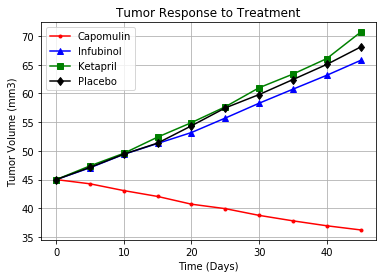

In [43]:
Capomulin = plt.plot(new1["Capomulin"], marker=".", color="red", label="Capomulin")
Infubinol = plt.plot(new1["Infubinol"], marker="^", color="blue", label="Infubinol")
Ketapril = plt.plot(new1["Ketapril"], marker="s", color="green", label="Ketapril")
Placebo = plt.plot(new1["Placebo"], marker="d", color="black", label="Placebo")
plt.legend(loc="best")
plt.grid()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

## Metastatic Response to Treatment

In [44]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

In [45]:
metastatic_response_treatment = combined_data.groupby(["Drug","Timepoint"]).mean()
metastatic_response_treatment

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
...                                 ...               ...
Zoniferol 25                  55.432935          1.687500
          30                  57.713531          1.933333
          35                  60.089372          2.285714
          40                  62.916692          2.785714
          45                  65.960888          3.071429

[100 rows x 2 columns]

In [46]:
metastatic_response_treatment.iloc[:,[1]]

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [47]:
metastatic_response_std_error = combined_data.groupby(["Drug","Timepoint"]).sem()
metastatic_response_std_error

Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731
...                               ...       ...                 ...
Zoniferol 25                 0.236621       NaN            0.602513
          30                 0.248168       NaN            0.800043
          35                 0.285714       NaN            0.881426
          40                 0.299791       NaN            0.998515
          45                 0.286400       NaN            1.003576

[100 rows x 3 columns]

In [48]:
metastatic_response_std_error.iloc[:,[0]]

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [49]:
Capomulin = metastatic_response_treatment.loc["Capomulin"]["Metastatic Sites"]
Ceftamin = metastatic_response_treatment.loc["Ceftamin"]["Metastatic Sites"]
Infubinol = metastatic_response_treatment.loc["Infubinol"]["Metastatic Sites"]
Ketapril = metastatic_response_treatment.loc["Ketapril"]["Metastatic Sites"]
Naftisol = metastatic_response_treatment.loc["Naftisol"]["Metastatic Sites"]
Placebo = metastatic_response_treatment.loc["Placebo"]["Metastatic Sites"]
Propriva = metastatic_response_treatment.loc["Propriva"]["Metastatic Sites"]
Ramicane = metastatic_response_treatment.loc["Ramicane"]["Metastatic Sites"]
Stelasyn = metastatic_response_treatment.loc["Stelasyn"]["Metastatic Sites"]
Zoniferol = metastatic_response_treatment.loc["Zoniferol"]["Metastatic Sites"]

In [50]:
new2 = pd.DataFrame({"Capomulin":Capomulin, "Ceftamin":Ceftamin, "Infubinol":Infubinol,
                    "Ketapril":Ketapril, "Naftisol":Naftisol, "Placebo":Placebo,
                    "Propriva":Propriva, "Ramicane":Ramicane, "Stelasyn":Stelasyn, "Zoniferol":Zoniferol})

new2

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


Text(0, 0.5, 'Met. Sites')

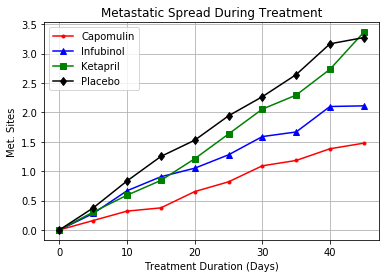

In [51]:
Capomulin = plt.plot(new2["Capomulin"], marker=".", color="red", label="Capomulin")
Infubinol = plt.plot(new2["Infubinol"], marker="^", color="blue", label="Infubinol")
Ketapril = plt.plot(new2["Ketapril"], marker="s", color="green", label="Ketapril")
Placebo = plt.plot(new2["Placebo"], marker="d", color="black", label="Placebo")
plt.legend(loc="best")
plt.grid()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

## Survival Rates

In [52]:
mouse_count = combined_data.groupby(["Drug","Timepoint"]).count()
mouse_count

Mouse ID  Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                                
Capomulin 0                25                  25                25
          5                25                  25                25
          10               25                  25                25
          15               24                  24                24
          20               23                  23                23
...                       ...                 ...               ...
Zoniferol 25               16                  16                16
          30               15                  15                15
          35               14                  14                14
          40               14                  14                14
          45               14                  14                14

[100 rows x 3 columns]

In [53]:
mouse_count.iloc[:,[0]]

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
...                       ...
Zoniferol 25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [54]:
Capomulin = mouse_count.loc["Capomulin"]["Mouse ID"]
Ceftamin = mouse_count.loc["Ceftamin"]["Mouse ID"]
Infubinol = mouse_count.loc["Infubinol"]["Mouse ID"]
Ketapril = mouse_count.loc["Ketapril"]["Mouse ID"]
Naftisol = mouse_count.loc["Naftisol"]["Mouse ID"]
Placebo = mouse_count.loc["Placebo"]["Mouse ID"]
Propriva = mouse_count.loc["Propriva"]["Mouse ID"]
Ramicane = mouse_count.loc["Ramicane"]["Mouse ID"]
Stelasyn = mouse_count.loc["Stelasyn"]["Mouse ID"]
Zoniferol = mouse_count.loc["Zoniferol"]["Mouse ID"]

In [55]:
mouse_count_df = pd.DataFrame({"Capomulin":(((Capomulin/100)*4)*100), "Ceftamin":(((Ceftamin/100)*4)*100), "Infubinol":(((Infubinol/100)*4)*100),
                              "Ketapril":(((Ketapril/100)*4)*100), "Naftisol":(((Naftisol/100)*4)*100), "Placebo":(((Placebo/100)*4)*100),
                              "Propriva":(((Propriva/100)*4)*100), "Ramicane":(((Ramicane/100)*4)*100), "Stelasyn":(((Stelasyn/100)*4)*100), "Zoniferol":(((Zoniferol/100)*4)*100)})

mouse_count_df

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


Text(0, 0.5, 'Survival Rate (%)')

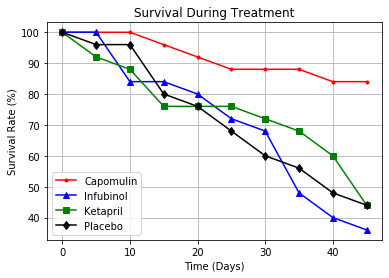

In [56]:
Capomulin = plt.plot(mouse_count_df["Capomulin"], marker=".", color="red", label="Capomulin")
Infubinol = plt.plot(mouse_count_df["Infubinol"], marker="^", color="blue", label="Infubinol")
Ketapril = plt.plot(mouse_count_df["Ketapril"], marker="s", color="green", label="Ketapril")
Placebo = plt.plot(mouse_count_df["Placebo"], marker="d", color="black", label="Placebo")
plt.legend(loc="best")
plt.grid()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")


# Summary Bar Graph

In [69]:
Capomulin = tumor_response_treatment.loc["Capomulin"]["Tumor Volume (mm3)"]
Ceftamin = tumor_response_treatment.loc["Ceftamin"]["Tumor Volume (mm3)"]
Infubinol = tumor_response_treatment.loc["Infubinol"]["Tumor Volume (mm3)"]
Ketapril = tumor_response_treatment.loc["Ketapril"]["Tumor Volume (mm3)"]
Naftisol = tumor_response_treatment.loc["Naftisol"]["Tumor Volume (mm3)"]
Placebo = tumor_response_treatment.loc["Placebo"]["Tumor Volume (mm3)"]
Propriva = tumor_response_treatment.loc["Propriva"]["Tumor Volume (mm3)"]
Ramicane = tumor_response_treatment.loc["Ramicane"]["Tumor Volume (mm3)"]
Stelasyn = tumor_response_treatment.loc["Stelasyn"]["Tumor Volume (mm3)"]
Zoniferol = tumor_response_treatment.loc["Zoniferol"]["Tumor Volume (mm3)"]

In [70]:
new1 = pd.DataFrame({"Capomulin":Capomulin, "Ceftamin":Ceftamin, "Infubinol":Infubinol, "Ketapril":Ketapril,
                    "Naftisol":Naftisol, "Placebo":Placebo, "Propriva":Propriva, "Ramicane":Ramicane, "Stelasyn":Stelasyn,
                    "Zoniferol":Zoniferol})
new1

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [71]:
percent_change = new1.pct_change()
percent_change

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.016309,0.033401,0.045822,0.053093,0.039913,0.047235,0.049977,-0.023448,0.056166,0.041152
10,-0.026698,0.038322,0.049762,0.046278,0.040561,0.048758,0.039209,-0.032152,0.040743,0.039231
15,-0.023674,0.037463,0.038306,0.056829,0.045977,0.039180,0.040035,-0.024379,0.041759,0.042908
20,-0.032046,0.041182,0.037065,0.048110,0.053228,0.058503,0.044636,-0.030286,0.049253,0.047092
25,-0.019078,0.040850,0.047325,0.050219,0.057562,0.057357,0.040441,-0.031413,0.038817,0.042554
30,-0.029299,0.045717,0.046381,0.057482,0.049840,0.040473,0.048505,-0.006957,0.065175,0.041142
35,-0.024568,0.036252,0.041905,0.038974,0.052478,0.043665,0.037010,-0.032327,0.043692,0.041166
40,-0.022710,0.044883,0.039846,0.042557,0.046513,0.042167,0.044662,-0.023441,0.046695,0.047052


In [116]:
Capomulin_sum = (percent_change.iloc[:,0].sum()*100)
Ceftamin_sum = (percent_change.iloc[:,1].sum()*100)
Infubinol_sum = (percent_change.iloc[:,2].sum()*100)
Ketapril_sum = (percent_change.iloc[:,3].sum()*100)
Naftisol_sum = (percent_change.iloc[:,4].sum()*100)
Placebo_sum = (percent_change.iloc[:,5].sum()*100)
Propriva_sum = (percent_change.iloc[:,6].sum()*100)
Ramicane_sum = (percent_change.iloc[:,7].sum()*100)
Stelasyn_sum = (percent_change.iloc[:,8].sum()*100)
Zoniferol_sum = (percent_change.iloc[:,9].sum()*100)

In [118]:
summaryList=[Capomulin_sum,Ceftamin_sum,Infubinol_sum,Ketapril_sum,Naftisol_sum,Placebo_sum,Propriva_sum,Ramicane_sum,
            Stelasyn_sum,Zoniferol_sum]
summaryList

[-21.391539240492598,
 36.141888986075955,
 38.746192394408084,
 46.30808273672407,
 44.19379966323389,
 42.39359172334724,
 39.54368358743483,
 -24.86557932492932,
 42.94552743236515,
 39.06804496427301]

In [295]:
summary_df = pd.DataFrame(summaryList, index=["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo",
                                              "Propriva","Ramicane","Stelasyn","Zoniferol"],
                         columns=["Percent Change"]).rename_axis("Drug")
summary_df


,Percent Change
Drug,
Capomulin,-21.391539
Ceftamin,36.141889
Infubinol,38.746192
Ketapril,46.308083
Naftisol,44.193800
Placebo,42.393592
Propriva,39.543684
Ramicane,-24.865579
Stelasyn,42.945527


In [296]:
drugListChange = [summary_df.loc["Capomulin"][0],summary_df.loc["Infubinol"][0],summary_df.loc["Ketapril"][0],
                 summary_df.loc["Placebo"][0]]
drugListChange

[-21.391539240492598, 38.746192394408084, 46.30808273672407, 42.39359172334724]

In [297]:
drugList = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

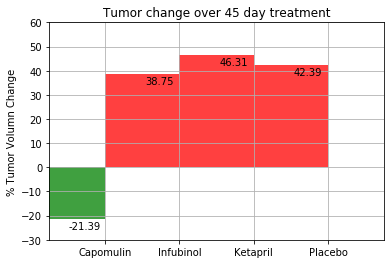

In [298]:
x_axis = np.arange(4)
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
   
    
plt.title("Tumor change over 45 day treatment")
plt.ylabel("% Tumor Volumn Change")

color_dict = {'Capomulin':'green',"Infubinol":'red',"Ketapril":'red',"Placebo":'red'}

plt.xlim(-0.75, len(drugListChange)-.25)
plt.ylim(-30,60)

plt.bar(x_axis, drugListChange, width=-1, alpha=0.75, align="edge", 
        color=[color_dict[x] for x in drugList])

plt.xticks(tick_locations, drugList)
plt.grid()

for x,y in zip(x_axis,drugListChange):
    
    drugListChange = "{:.2f}".format(y)
    
    plt.annotate(drugListChange,
                (x,y),
                textcoords="offset points",
                xytext=(-20,-10),
                ha='center')


